# TP5: Delitos en Bucaramanga

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler

In [2]:
df=pd.read_excel("bucaramangadltos.xlsx")
df.head()

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,50946,ARMA BLANCA / CORTOPUNZANTE,KENNEDY,7.153943,-73.136794,URBANA,01. Norte,2015,Enero,1,04. Jueves,ARTÍCULO 103. HOMICIDIO,HOMICIDIO,Lesiones fatales,28,04. Jovenes,UNION LIBRE,MASCULINO,A PIE,A PIE
1,50947,ARMA BLANCA / CORTOPUNZANTE,CABECERA DEL LLANO,7.116619,-73.109865,URBANA,12. Cabecera del Llano,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,40,05. Adultez,SOLTERO,MASCULINO,A PIE,A PIE
2,50948,ARMA BLANCA / CORTOPUNZANTE,VILLA MARIA,7.154916,-73.130231,URBANA,02. Nor Oriental,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,18,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
3,50949,ARMA BLANCA / CORTOPUNZANTE,VILLAS DE SAN IGNACIO,7.156274,-73.142024,URBANA,01. Norte,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,37,05. Adultez,UNION LIBRE,FEMENINO,A PIE,A PIE
4,50950,ARMA BLANCA / CORTOPUNZANTE,GAITAN,7.130512,-73.131001,URBANA,04. Occidental,2015,Enero,1,04. Jueves,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,18,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE


In [3]:
df.shape # posee 76099 filas y 20 columnas

(76099, 20)

In [4]:
df.columns

Index(['ORDEN', 'ARMAS_MEDIOS', 'BARRIOS_HECHO', 'LATITUD', 'LONGITUD', 'ZONA',
       'NOM_COMUNA', 'ANO', 'MES', 'DIA', 'DIA_SEMANA', 'DESCRIPCION_CONDUCTA',
       'CONDUCTA', 'CLASIFICACIONES DELITO', 'EDAD', 'CURSO_DE_VIDA',
       'ESTADO_CIVIL_PERSONA', 'GENERO', 'MOVIL_AGRESOR', 'MOVIL_VICTIMA'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76099 entries, 0 to 76098
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ORDEN                   76099 non-null  int64  
 1   ARMAS_MEDIOS            76099 non-null  object 
 2   BARRIOS_HECHO           76099 non-null  object 
 3   LATITUD                 76099 non-null  float64
 4   LONGITUD                76099 non-null  float64
 5   ZONA                    76099 non-null  object 
 6   NOM_COMUNA              76099 non-null  object 
 7   ANO                     76099 non-null  int64  
 8   MES                     76099 non-null  object 
 9   DIA                     76099 non-null  int64  
 10  DIA_SEMANA              76099 non-null  object 
 11  DESCRIPCION_CONDUCTA    76099 non-null  object 
 12  CONDUCTA                76099 non-null  object 
 13  CLASIFICACIONES DELITO  76099 non-null  object 
 14  EDAD                    76099 non-null

In [6]:
df.describe

<bound method NDFrame.describe of         ORDEN                 ARMAS_MEDIOS          BARRIOS_HECHO   LATITUD  \
0       50946  ARMA BLANCA / CORTOPUNZANTE                KENNEDY  7.153943   
1       50947  ARMA BLANCA / CORTOPUNZANTE     CABECERA DEL LLANO  7.116619   
2       50948  ARMA BLANCA / CORTOPUNZANTE            VILLA MARIA  7.154916   
3       50949  ARMA BLANCA / CORTOPUNZANTE  VILLAS DE SAN IGNACIO  7.156274   
4       50950  ARMA BLANCA / CORTOPUNZANTE                 GAITAN  7.130512   
...       ...                          ...                    ...       ...   
76094  132883          SIN EMPLEO DE ARMAS          SAN FRANCISCO  7.130358   
76095  132884              ARMA TRAUMATICA              COLORADOS  7.178838   
76096  132885                 CONTUNDENTES                 CENTRO  7.120212   
76097  132886                 CONTUNDENTES                 CENTRO  7.120212   
76098  132887          SIN EMPLEO DE ARMAS  CHORRERAS DE DON JUAN  7.175989   

        LONGITUD 

In [7]:
df.isnull()

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76094,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76095,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76096,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76097,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

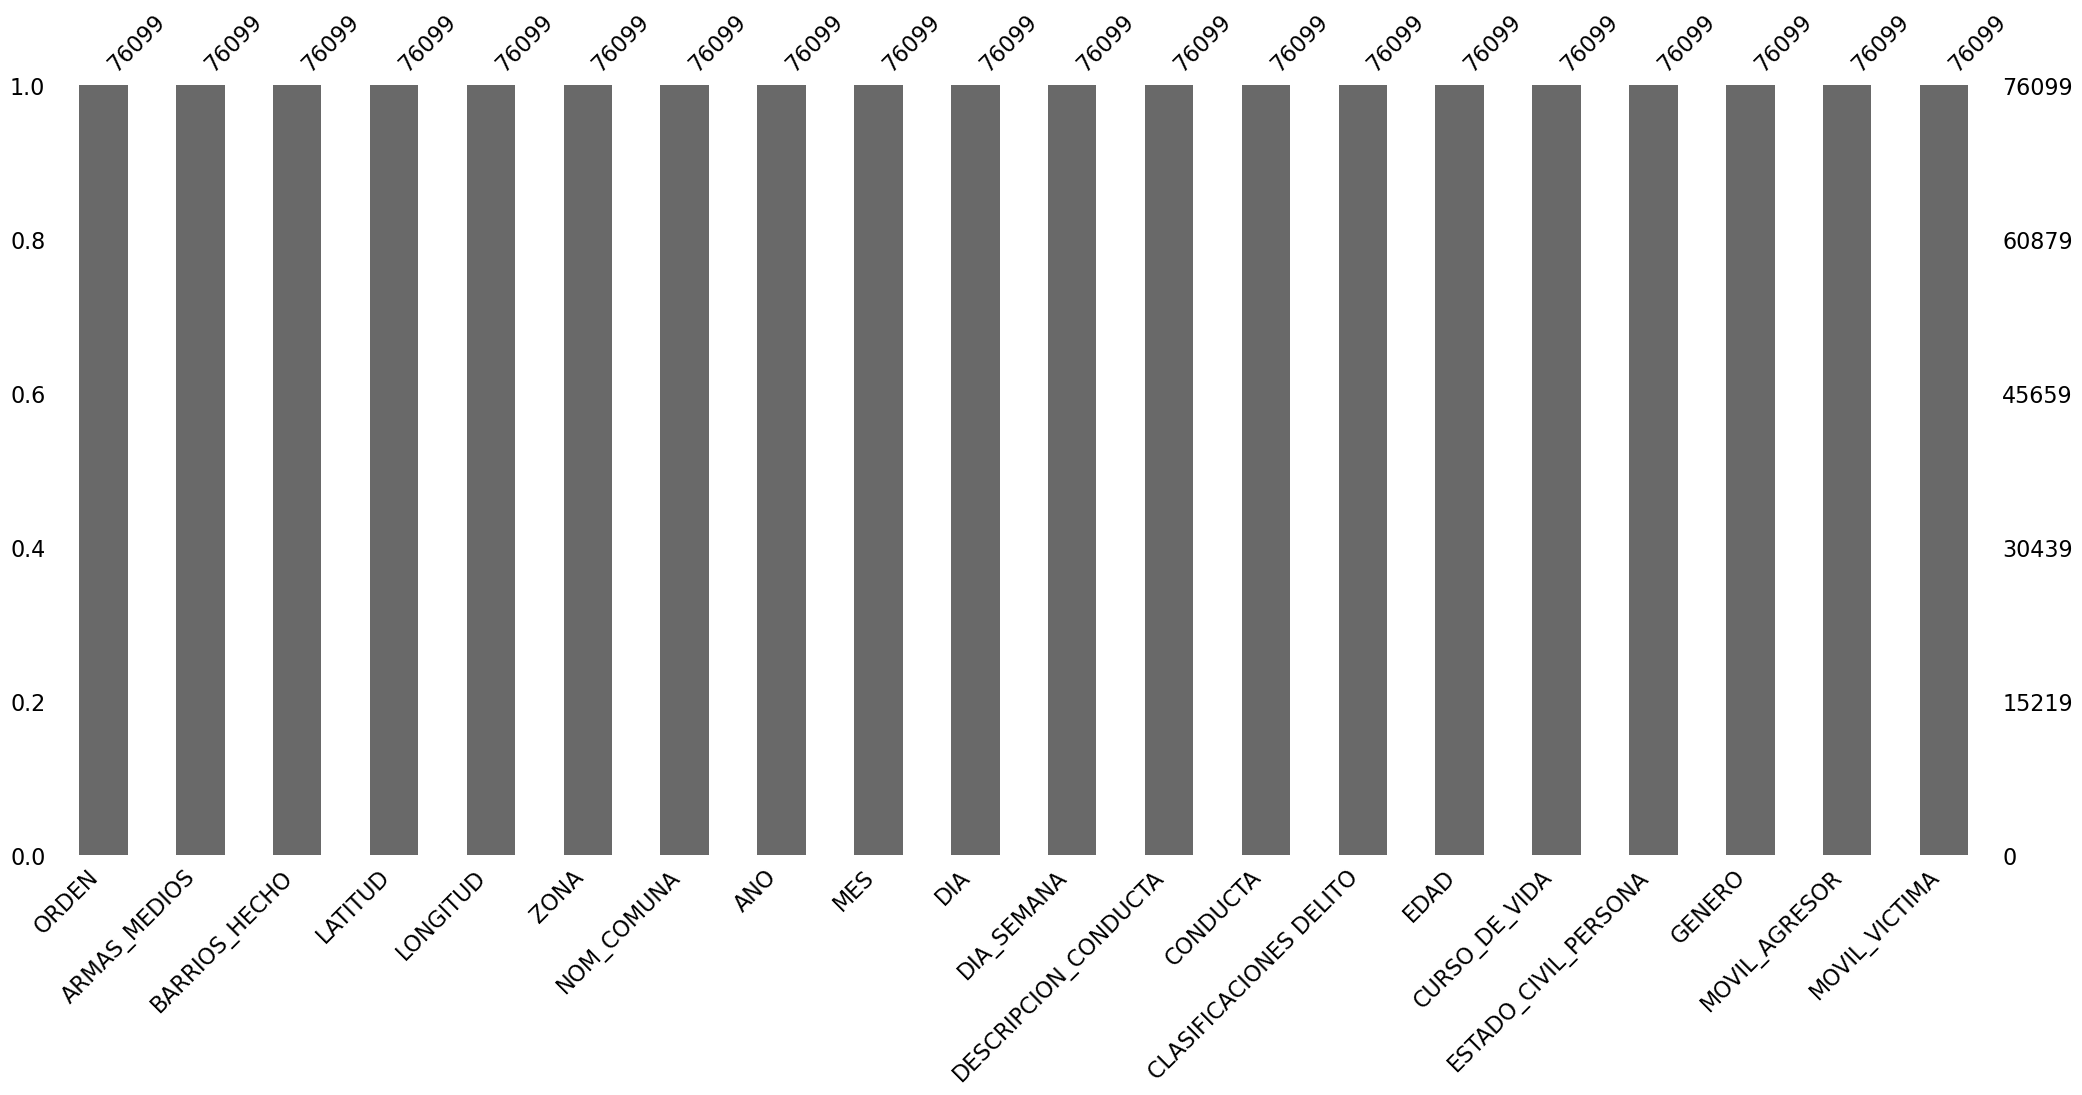

In [8]:
msno.bar(df) #no se encuentran nulos

In [9]:
dfdu=df.drop_duplicates()
print(dfdu.shape) # no se encuentran duplicados

(76099, 20)


In [10]:
df = df.rename(columns={"CLASIFICACIONES DELITO": "CLASIFICACIONES_DELITO"}) #se renombra la esta variable

In [11]:
df['ANO'] = pd.to_datetime(df['ANO'], format='%Y')

df['ANO'] = df['ANO'].dt.year
#se convierte la columna ANO a datatime

In [14]:
df = df.rename(columns={"ANO": "ANIO"}) #se renombra la variable

In [15]:
df.head()

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANIO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES_DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,50946,ARMA BLANCA / CORTOPUNZANTE,KENNEDY,7.153943,-73.136794,URBANA,01. Norte,2015,Enero,1,04. Jueves,ARTÍCULO 103. HOMICIDIO,HOMICIDIO,Lesiones fatales,28,04. Jovenes,UNION LIBRE,MASCULINO,A PIE,A PIE
1,50947,ARMA BLANCA / CORTOPUNZANTE,CABECERA DEL LLANO,7.116619,-73.109865,URBANA,12. Cabecera del Llano,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,40,05. Adultez,SOLTERO,MASCULINO,A PIE,A PIE
2,50948,ARMA BLANCA / CORTOPUNZANTE,VILLA MARIA,7.154916,-73.130231,URBANA,02. Nor Oriental,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,18,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
3,50949,ARMA BLANCA / CORTOPUNZANTE,VILLAS DE SAN IGNACIO,7.156274,-73.142024,URBANA,01. Norte,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,37,05. Adultez,UNION LIBRE,FEMENINO,A PIE,A PIE
4,50950,ARMA BLANCA / CORTOPUNZANTE,GAITAN,7.130512,-73.131001,URBANA,04. Occidental,2015,Enero,1,04. Jueves,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,18,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE


In [16]:
df=df.drop(columns=["LATITUD","LONGITUD","ORDEN"]) #Se eliminan estas columnas ya que no aportarán datos

In [17]:
df2 = df.copy()

In [18]:
label_encoder = LabelEncoder()
#transformo variables categóricas en numéricas

In [19]:
df2['ARMAS_MEDIOS'] = label_encoder.fit_transform(df2['ARMAS_MEDIOS'])
df2['BARRIOS_HECHO'] = label_encoder.fit_transform(df2['BARRIOS_HECHO'])
df2['ZONA'] = label_encoder.fit_transform(df2['ZONA'])
df2['NOM_COMUNA'] = label_encoder.fit_transform(df2['NOM_COMUNA'])
df2['BARRIOS_HECHO'] = label_encoder.fit_transform(df2['BARRIOS_HECHO'])
df2['MES'] = label_encoder.fit_transform(df2['MES'])
df2['DIA_SEMANA'] = label_encoder.fit_transform(df2['DIA_SEMANA'])
df2['DESCRIPCION_CONDUCTA'] = label_encoder.fit_transform(df2['DESCRIPCION_CONDUCTA'])
df2['CONDUCTA'] = label_encoder.fit_transform(df2['CONDUCTA'])
df2['NOM_COMUNA'] = label_encoder.fit_transform(df2['NOM_COMUNA'])
df2['CLASIFICACIONES_DELITO'] = label_encoder.fit_transform(df2['CLASIFICACIONES_DELITO'])
df2['CURSO_DE_VIDA'] = label_encoder.fit_transform(df2['CURSO_DE_VIDA'])
df2['ESTADO_CIVIL_PERSONA'] = label_encoder.fit_transform(df2['ESTADO_CIVIL_PERSONA'])
df2['GENERO'] = label_encoder.fit_transform(df2['GENERO'])
df2['MOVIL_AGRESOR'] = label_encoder.fit_transform(df2['MOVIL_AGRESOR'])
df2['MOVIL_VICTIMA'] = label_encoder.fit_transform(df2['MOVIL_VICTIMA'])

In [20]:
df2. head()

,ARMAS_MEDIOS,BARRIOS_HECHO,ZONA,NOM_COMUNA,ANIO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES_DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,3,172,2,0,2015,3,1,3,1,2,0,28,3,5,1,0,0
1,3,55,2,11,2015,3,1,3,4,16,1,40,4,4,1,0,0
2,3,431,2,1,2015,3,1,3,4,16,1,18,3,4,1,0,0
3,3,441,2,0,2015,3,1,3,4,16,1,37,4,5,0,0,0
4,3,134,2,3,2015,3,1,3,15,9,1,18,3,4,1,0,0


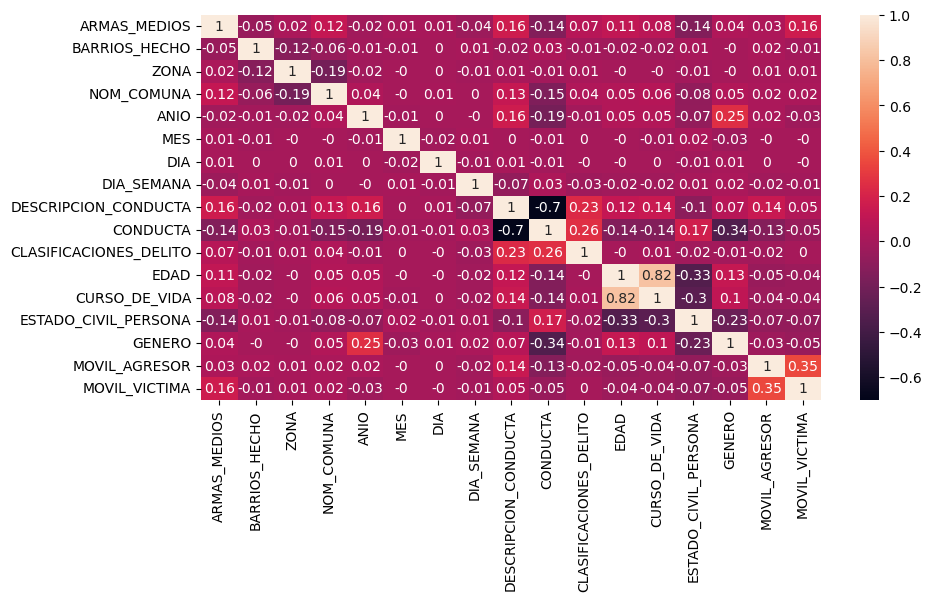

In [21]:
correlation_matrix = df2.corr(numeric_only=True).round(2)
correlation_matrix

plt.figure(figsize=(10,5))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

  ## Para poder responder el PROBLEMA COMERCIAL (*Para poder tomar intervención correctamente y poder evaluar programas de seguridad que impliquen acciones preventivas necesita saber que personas son más vulnerables ante hechos delictivos (si son jovenes, adultos, mayores, infantes)) se intentará predecir la variable objetivo CURSO_DE_VIDA

In [22]:
scaler = RobustScaler()

In [23]:
df2_scaled = scaler.fit_transform(df2)

In [24]:
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)

In [25]:
df3 = df2.copy()

## Se utiliza un Wrapper Methods feature_selection


In [26]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

## Se utiliza la variable "CURSO_DE_VIDA" como variable objetivo

In [27]:
X = df3.drop("CURSO_DE_VIDA", 1)      
y = df3['CURSO_DE_VIDA']

C:\Users\Mariano\AppData\Local\Temp\ipykernel_13192\2881865997.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df3.drop("CURSO_DE_VIDA", 1)


In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [29]:
sfs.fit(X, y)
sfs.k_feature_names_ 
#se determina que las siguientes variables proporcionarán un mejor rendimiento apara predecir la variable objetivo

('ARMAS_MEDIOS',
 'NOM_COMUNA',
 'MES',
 'DIA_SEMANA',
 'DESCRIPCION_CONDUCTA',
 'CONDUCTA',
 'EDAD',
 'ESTADO_CIVIL_PERSONA',
 'GENERO',
 'MOVIL_AGRESOR',
 'MOVIL_VICTIMA')

## Se utilizan las variables dadas

In [30]:
 X = df3[['ARMAS_MEDIOS',
 'BARRIOS_HECHO',
 'ZONA',
 'NOM_COMUNA',
 'ANIO',
 'MES',
 'DESCRIPCION_CONDUCTA',
 'CONDUCTA',
 'EDAD',
 'ESTADO_CIVIL_PERSONA',
 'GENERO']]         
y = df3['CURSO_DE_VIDA']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Se utiliza RandomForestClassifier con la variable "curso_de_vida"

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=7, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [33]:
y_pred= clf.predict(X_test)

In [34]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       1.00      0.49      0.66        79
           1       0.99      0.85      0.91       107
           2       0.96      1.00      0.98       611
           3       0.99      1.00      1.00      4930
           4       1.00      1.00      1.00      8635
           5       1.00      1.00      1.00       858

    accuracy                           1.00     15220
   macro avg       0.99      0.89      0.93     15220
weighted avg       1.00      1.00      1.00     15220



## Se observa un rendimiento perfecto en el conjunto de entrenamiento, es probable que sea un caso de sobreajuste / overfitting.

## se realiza un ajuste de "max_depth", para mitigar el overfitting.

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [36]:
y_pred= clf.predict(X_test)

In [37]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.00      0.00      0.00       107
           2       0.00      0.00      0.00       611
           3       0.86      1.00      0.93      4930
           4       0.91      1.00      0.95      8635
           5       0.00      0.00      0.00       858

    accuracy                           0.89     15220
   macro avg       0.30      0.33      0.31     15220
weighted avg       0.79      0.89      0.84     15220



E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Se puede observar un mejor resultado del accuracy, con un "max_depth" menor.